In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources_copy/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# create list of column names and type for measurement class
columns_measurement = inspector.get_columns('measurement')

for column in columns_measurement:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# creat list of clumn names and type for station class
columns_station = inspector.get_columns('station')

for column in columns_station:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = session.query(func.max(measurement.date)).scalar()
date

'2017-08-23'

In [14]:
# Calculate the date one year from the last date in data set.
date_one_year = dt.date(2017,8,23)-dt.timedelta(days=365)
date_one_year


datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]

precipitation_scores = session.query(*sel).\
    filter(measurement.date >= date_one_year).\
    order_by(measurement.date).all()
precipitation_scores

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values(by='Date', ascending=True)
precipitation_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


<function matplotlib.pyplot.show(*args, **kw)>

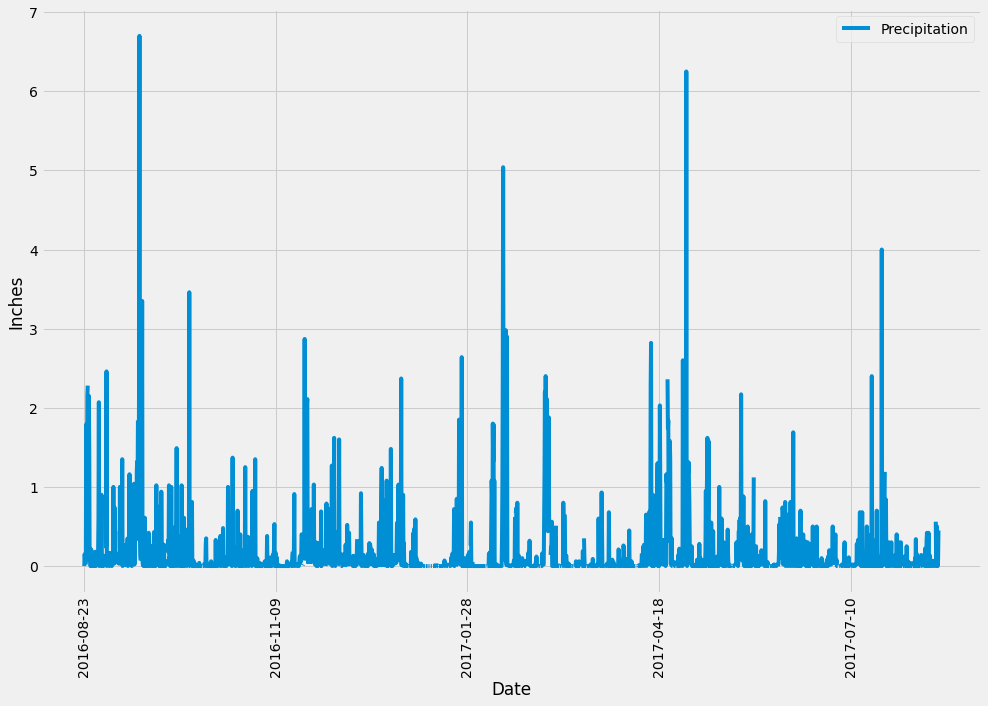

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot='90', figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count()
station_count

9

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_active = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()
most_active

[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp = session.query(measurement.tobs).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date >= date_one_year).\
order_by(measurement.date.desc()).all()
most_active_temp

[(79.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (83.0),
 (82.0),
 (77.0),
 (76.0),
 (81.0),
 (82.0),
 (81.0),
 (76.0),
 (75.0),
 (77.0),
 (75.0),
 (82.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (80.0),
 (80.0),
 (76.0),
 (74.0),
 (74.0),
 (72.0),
 (69.0),
 (78.0),
 (78.0),
 (75.0),
 (74.0),
 (77.0),
 (78.0),
 (76.0),
 (81.0),
 (79.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (71.0),
 (77.0),
 (72.0),
 (72.0),
 (74.0),
 (72.0),
 (72.0),
 (75.0),
 (79.0),
 (73.0),
 (75.0),
 (74.0),
 (76.0),
 (74.0),
 (74.0),
 (74.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (80.0),
 (75.0),
 (72.0),
 (74.0),
 (80.0),
 (74.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (71.0),
 (74.0),
 (76.0),
 (68.0),
 (69.0),
 (74.0),
 (74.0),
 (74.0),
 (77.0),
 (76.0),
 (75.0),
 (70.0),
 (74.0),
 (67.0),
 (70.0),
 (75.0),
 (79.0),
 (70.0),
 (75.0),
 (70.0),
 (75.0),
 (65.0),
 (60.0),
 (72.0),
 (67.0),
 (70.0),
 (74.0),
 (72.0),
 (68.0),
 (76.0),
 (72.0),
 (69.0),
 

In [30]:
#create DF
most_active_df = pd.DataFrame(most_active_temp)
most_active_df

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
...,...
347,75.0
348,80.0
349,80.0
350,77.0


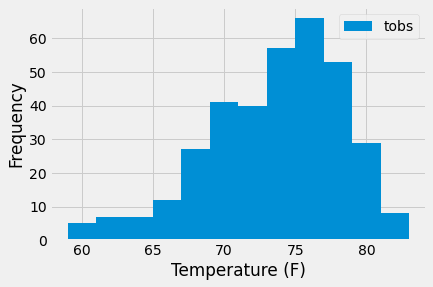

In [33]:
#plot results
most_active_df['tobs'].plot.hist(bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

# Close session

In [34]:
# Close Session
session.close()